<a href="https://colab.research.google.com/github/boldasl/20_IT_SYSTEM_DESIGN_008/blob/master/HW2_FullAdder_Tensorflow-1.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip uninstall tensorflow
!pip install tensorflow==1.5
!pip install "numpy<1.17"

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import timeit

print("# Tensorflow Version:", tf.__version__)

# Tensorflow Version: 1.5.0


In [0]:
# model configuration
NumInputNode = 3
NumOutputNode = 2
NumHiddenLayer = 1
NumHiddenNode = 3

# learning configuration
LearningRate = 0.3
Epoch = 10000
Activation = "tanh"

In [0]:
# training data set
train_data = [[-1, -1, -1], [-1, -1, 1], [-1, 1, -1], [-1, 1, 1], [1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]] # test input = [a, b, cin]
train_label = [[-1, -1], [1, -1], [1, -1], [-1, 1], [1, -1], [-1, 1], [-1, 1], [1, 1]] # ground truth value = [sum, cout]
train_data = np.array(train_data)
train_label = np.array(train_label)

In [0]:
# input & output init
x = tf.placeholder(tf.float32, [None, NumInputNode])
y = tf.placeholder(tf.float32, [None, NumOutputNode])

# weight & bias init
w_inputnode = tf.Variable(tf.random_normal([NumInputNode, NumHiddenNode]))
if NumHiddenLayer > 1:
    w_hiddennode = tf.Variable(tf.random_normal([NumHiddenLayer-1, NumHiddenNode, NumHiddenNode]))
w_outputnode = tf.Variable(tf.random_normal([NumHiddenNode, NumOutputNode]))
b_hiddennode = tf.Variable(tf.random_normal([NumHiddenLayer, NumHiddenNode]))
b_outputnode = tf.Variable(tf.random_normal([NumOutputNode]))

# model construction
o_hidden = []
if Activation == "sigmoid": o_hidden.append(tf.sigmoid(tf.matmul(x, w_inputnode) + b_hiddennode[0]))
elif Activation == "relu": o_hidden.append(tf.nn.relu(tf.matmul(x, w_inputnode) + b_hiddennode[0]))
elif Activation == "tanh": o_hidden.append(tf.tanh(tf.matmul(x, w_inputnode) + b_hiddennode[0]))
if NumHiddenLayer > 1:
    for idx_layer in range(NumHiddenLayer-1):
        if Activation == "sigmoid": o_hidden.append(tf.sigmoid(tf.matmul(o_hidden[idx_layer], w_hiddennode[idx_layer]) + b_hiddennode[idx_layer+1]))
        elif Activation == "relu": o_hidden.append(tf.nn.relu(tf.matmul(o_hidden[idx_layer], w_hiddennode[idx_layer]) + b_hiddennode[idx_layer+1]))
        elif Activation == "tanh": o_hidden.append(tf.tanh(tf.matmul(o_hidden[idx_layer], w_hiddennode[idx_layer]) + b_hiddennode[idx_layer+1]))
y_h = tf.tanh(tf.matmul(o_hidden[NumHiddenLayer-1], w_outputnode) + b_outputnode)



In [0]:
cost = tf.reduce_mean(tf.square(y - y_h)) # mean square error
predicted = 2*tf.cast(y_h > 0, dtype=tf.float32)-1 # if y_h > 0, 1 else -1
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

< Neural Network Using Tensorflow 1.5 >
# of InputNode  : 3   # of OutputNode: 2
# of HiddenLayer: 1   # of HiddenNode: 3
Activation Function: tanh

Learning Information
Epoch: 10000, Learning Rate: 0.3
Learning Start!
100.0%, Cost = 0.0001		
4.66433447899999 [s]
Accuracy: 1.0


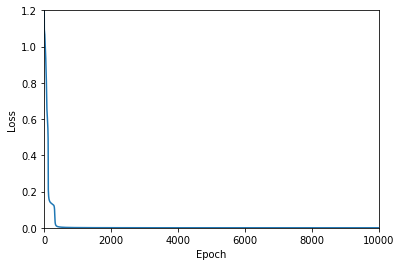

'\nprint(np.sum(w_i))\nprint(np.sum(w_o))\nprint(np.sum(b_h))\nprint(np.sum(b_o))\n'

In [6]:
train = tf.train.GradientDescentOptimizer(LearningRate).minimize(cost)

print("< Neural Network Using Tensorflow 1.5 >")
print("# of InputNode  : {}   # of OutputNode: {}".format(NumInputNode, NumOutputNode))
print("# of HiddenLayer: {}   # of HiddenNode: {}".format(NumHiddenLayer, NumHiddenNode))
print("Activation Function: {}\n".format(Activation))

# learning info
print("Learning Information")
print("Epoch: {}, Learning Rate: {}".format(Epoch, LearningRate))
print("Learning Start!")

w_i = sess.run(w_inputnode)
w_o = sess.run(w_outputnode)
b_h = sess.run(b_hiddennode)
b_o = sess.run(b_outputnode)

loss = []
before = timeit.default_timer()
for idx_epoch in range(Epoch):
    _, c = sess.run([train, cost], feed_dict={x:train_data, y:train_label})
    loss.append(c)
    if idx_epoch % 10 == 0:
        print("{0:0.1f}%, Cost = {1:0.4f}\r".format(idx_epoch/Epoch*100, c), end='')
print("100.0%, Cost = {0:0.4f}\t\t".format(c))
print(timeit.default_timer() - before, "[s]")

test_data = train_data + np.random.normal(0, 0.1, size=train_data.shape)
test_label = train_label

print("Accuracy: {}".format(sess.run(accuracy, feed_dict={x:test_data, y:test_label})))

w_i = abs(w_i - sess.run(w_inputnode))
w_o = abs(w_o - sess.run(w_outputnode))
b_h = abs(b_h - sess.run(b_hiddennode))
b_o = abs(b_o - sess.run(b_outputnode))


plt.plot(range(Epoch), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xlim(0, Epoch)
plt.ylim(0, 1.2)
plt.show()
'''
print(np.sum(w_i))
print(np.sum(w_o))
print(np.sum(b_h))
print(np.sum(b_o))
'''